# Statistical Inference on Categorical Data
In this Notebook, we will work on more statisical inference, focusing primarily on categorical data. The first two parts of this Notebook is mostly adopted from the [Inferential Statistics](https://www.coursera.org/learn/inferential-statistics-intro/home/welcome) course of Duke University, converted from R to Python and tweaked to match the needs of our CSMODEL course.

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, email your instructor.

## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with 'Question #' on them. The answer must strictly consume one line only.
* You are expected to search how to some functions work on the Internet or via the docs. 
* The notebooks will undergo a 'Restart and Run All' command, so make sure that your code is working properly.
* You are expected to understand the dataset loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

## Import Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

## Atheism Survey

In August of 2012, news outlets ranging from the [Washington Post](http://www.washingtonpost.com/national/on-faith/poll-shows-atheism-on-the-rise-in-the-us/2012/08/13/90020fd6-e57d-11e1-9739-eef99c5fb285_story.html) to the [Huffington Post](http://www.huffingtonpost.com/2012/08/14/atheism-rise-religiosity-decline-in-america_n_1777031.html) presented a story about the rise of atheism in America. They based their story on a poll that asked people, "Irrespective of whether you attend a place of worship or not, would you say you are a religious person, not a religious person or a convinced atheist?" This type of question, which asks people to classify themselves in one way or another, is common in polling and generates categorical data. Let's take a look at the atheism survey and explore what's at play when making inference about population proportions using categorical data.

The press release for the poll, conducted by WIN-Gallup International, can be accessed [here](https://www.scribd.com/document/136318147/Win-gallup-International-Global-Index-of-Religiosity-and-Atheism-2012).

**Question #1:** How many people were interviewed for this survey?

Answer: 51927

**Question #2:** How did the interviewers talk to the selected sample of people?

Answer: "a world-wide network of leading opinion pollsters" from WIN-Gallup International asked people.

Look at [Table 6 in the press release (pages 15 and 16)](https://www.scribd.com/document/136318147/Win-gallup-International-Global-Index-of-Religiosity-and-Atheism-2012), which reports the sample size and response percentages for all 57 countries. While this is a useful format to summarize the data, we will base our analysis on the original dataset of individual responses to the survey. 

Let's load the dataset:

In [84]:
atheism_df = pd.read_csv('atheism.csv')
atheism_df.head()

,nationality,response,year
0,Afghanistan,non-atheist,2012
1,Afghanistan,non-atheist,2012
2,Afghanistan,non-atheist,2012
3,Afghanistan,non-atheist,2012
4,Afghanistan,non-atheist,2012


**Question #3:** What does each observation in the dataset represent?

Answer: individual response

To investigate the link between these two ways of organizing this data, take a look at the estimated proportion of atheists in the United States. Towards the bottom of Table 6, we see that this is 5%. We should be able to come to the same number using the `atheism_df` data.

Let us create a new `DataFrame` containing only the rows from `atheism_df` associated with respondents to the 2012 survey from the United States.

In [85]:
# Write your code here
us2012_atheists_df = atheism_df[(atheism_df['year'] == 2012) & (atheism_df['nationality'] == 'United States')]
us2012_atheists_df.head()


,nationality,response,year
49925,United States,non-atheist,2012
49926,United States,non-atheist,2012
49927,United States,non-atheist,2012
49928,United States,non-atheist,2012
49929,United States,non-atheist,2012


In [86]:
us2012_atheists_df.shape

(1002, 3)

Next, calculate the proportion of atheist responses for people interviewed from the United States in 2012. Express your answer in a floating point number from 0 to 100. Limit to 4 decimal places.

In [87]:
# Write your code here
us2012_atheists_df.response.unique()
us2012_atheists_df.response.value_counts()
50 / len(us2012_atheists_df) * 100

4.990019960079841

**Question #4:** What is the proportion of atheists in the United States in 2012 to the total number of responses from the United States in 2012? Express your answer in a floating point number from 0 to 100. Limit to 4 decimal places.

Answer: 4.99%

**Question #5:** How does the proportion compare with the proportion presented in [Table 6](https://www.scribd.com/document/136318147/Win-gallup-International-Global-Index-of-Religiosity-and-Atheism-2012)?

Answer: close enough

### Inference on Survey Data

The statistics we compute from our dataset are **sample statistics**. What we'd like, though, is insight into the **population parameters**. The question, "What proportion of people in your sample reported being atheists?" is answered with a *statistic*; while the question "What proportion of people on earth would report being atheists" is answered with *an estimate of the parameter*.

**Question #6:** What are the conditions to construct a 95% confidence interval for the proportion of atheists in the United States in 2012?

Answer: We need the central limit theorem where the conditions are for the samples to be independent of each other as well as having a large enough sample size.

**Question #7:** Are you confident that all conditions are met? Explain.

Answer: Yes, because the samples are independent of each other and the sample size is large enough

Construct a 95% confidence interval for the proportion of atheists in United States in 2012. We will report the result as:

$$p \pm ME$$

where $p$ is the proportion and $ME$ is the margin of error.

As we are dealing with categorical data, we cannot use the previous notebook's margin of error formula since it requires the standard deviation. As such, we are going to obtain the margin of error through the standard error of a **sample proportion**, as presented in the formula below:

$$ME =  z^* \times \sqrt{\frac{p(1-p)}{n}}$$

where $z^*$ still representing the critical value.

Compute and print the margin of error. Express your answer in a floating point number from 0 to 100. Limit to 4 decimal places.

In [88]:
# Write your code here
proportion = 50/len(us2012_atheists_df)
n = len(us2012_atheists_df)
ME = 1.96 * np.sqrt((proportion * (1 - proportion)) / n)
# ME * 100
ME

0.01348211307988444

**Question #8:** Given a 95% confidence level, what is the margin of error? Express your answer in a floating point number from 0 to 100. Limit to 4 decimal places.

Answer: 0.0135

Compute and print the confidence interval (minimum value, maximum value). Express your answer in a floating point number from 0 to 100. Limit to 4 decimal places.

In [89]:
# Write your code here
min_val = proportion - ME

max_val = proportion + ME

print(min_val, max_val)

0.03641808652091397 0.06338231268068284


**Question #9:** Specify the confidence interval as a range of values (minimum value, maximum value). Express your answer in a floating point number from 0 to 100. Limit to 4 decimal places.

Answer: (0.0364, 0.0634)

Although formal confidence intervals and hypothesis tests don't show up in the report, suggestions of inference appear at the bottom of page 7: "In general, the error margin for surveys of this kind is $\pm$ 3-5% at 95% confidence."

## Proportion and Margin of Error

Imagine you interviewed 1000 people on two questions: are you religious? and are you from Luzon? Even though both of these sample proportions are calculated from the same sample size, they might not have the same margin of error. Aside from being affected by the sample size, the margin of error is also affected by the proportion.

Since the population proportion $p$ is in this $ME$ formula, it should make sense that the margin of error is in some way dependent on the population proportion. We can visualize this relationship by creating a plot of $ME$ vs. $p$.

Generate values from 0 to 1 with interval of 0.01. Store the values in variable `p`.

In [90]:
# Write your code here
p = np.arange(0, 1.01, 0.01)

Let's set the sample size `n` to 1000.

In [91]:
n = 1000

Compute the margin of error for each value in `p` given a 99% confidence level. Store the values in variable `me`.

In [92]:
# Write your code here
me = 2.58 * np.sqrt( (p * (1 - p)) / n)
me

array([0.        , 0.00811778, 0.01142215, 0.01391766, 0.01598768,
       0.01778142, 0.01937578, 0.02081662, 0.02213393, 0.02334864,
       0.02447603, 0.02552766, 0.02651256, 0.02743791, 0.02830955,
       0.0291323 , 0.0299102 , 0.03064666, 0.03134461, 0.03200656,
       0.03263471, 0.03323096, 0.03379702, 0.03433436, 0.03484433,
       0.0353281 , 0.03578675, 0.03622122, 0.03663237, 0.03702098,
       0.03738775, 0.03773333, 0.03805828, 0.03836313, 0.03864837,
       0.03891441, 0.03916165, 0.03939044, 0.03960111, 0.03979394,
       0.03996919, 0.04012709, 0.04026784, 0.04039163, 0.0404986 ,
       0.0405889 , 0.04066263, 0.04071989, 0.04076073, 0.04078522,
       0.04079338, 0.04078522, 0.04076073, 0.04071989, 0.04066263,
       0.0405889 , 0.0404986 , 0.04039163, 0.04026784, 0.04012709,
       0.03996919, 0.03979394, 0.03960111, 0.03939044, 0.03916165,
       0.03891441, 0.03864837, 0.03836313, 0.03805828, 0.03773333,
       0.03738775, 0.03702098, 0.03663237, 0.03622122, 0.03578

Let's plot the relationship between `p` and `me`.

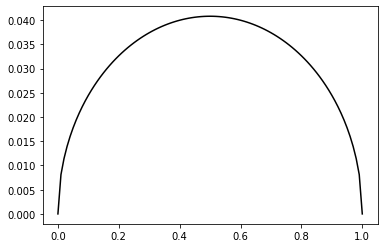

In [93]:
plt.plot(p, me, 'k')

**Question #10:** When do we get a low margin of error?

Answer: 0% and 100%

**Question #11:** What is the margin of error when the proportion is 50%?

Answer: 0.04079338

## Behavioral Survey Data

Next, we will look at behaviorial survey data. The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States collected by the Centers for Disease Control and Prevention (CDC). The BRFSS identifies risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage. The [BRFSS Web site](https://www.openintro.org/redirect.php?go=cdc_data_brfss&referrer=data_set_page) contains a complete description of the survey, the questions that were asked, and even research results that have been derived from the data.

This dataset is a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 questions or variables in this dataset, the one will we will use in this Notebok only includes 3 variables.

In [94]:
cdc_df = pd.read_csv('cdcpartial.csv')
cdc_df.head()

,genhlth,smoke100,exerany
0,good,0,0
1,good,1,0
2,good,1,1
3,good,0,1
4,very good,0,0


The variables in this Notebook are as follows:

- `genhlth` - A categorical vector indicating general health, with categories `excellent`, `very good`, `good`, `fair`, and `poor`.
- `smoke100` - A categorical vector, 1 if the respondent has smoked at least 100 cigarettes in their entire life and 0 otherwise.
- `exerany` - A categorical vector, 1 if the respondent exercised in the past month and 0 otherwise.

### Test of Independence Using Pearson's Chi-Squared Test
Let's check if the general health of people is independent of whether they exercised in the past month or not.

First, group the sample depending on whether they exercised or not in the past month. This should produce two groups. Afterwards, count the number of people in each group for each general health level. 

Store the values in variable `counts`.

In [95]:
# Write your code here
counts = cdc_df.groupby('exerany')['genhlth'].value_counts()

Let's display the count per subgroup.

In [96]:
counts

exerany  genhlth  
0        good         1731
         very good    1352
         fair          857
         excellent     762
         poor          384
1        very good    5620
         good         3944
         excellent    3895
         fair         1162
         poor          293
Name: genhlth, dtype: int64

**Question #12:** How many of the respondents exercised last month and reported 'excellent' general health?

Answer: 3895

**Question #13:** How many of the respondents did not exercise last month but reported 'very good' general health?

Answer: 1352 

At first glance, it appears that people who have exercised in the past month has better general health, but we do not know if this difference is statistically significant.

Let's use the chi-square test to determine whether the general health of people is independent of whether they exercised in the past month or not.

First, we need to convert our counts into a table format. We will create a new DataFrame for this.

In [97]:
table = pd.DataFrame([counts[0], counts[1]], index=['no exercise', 'exercise']).transpose()
table

,no exercise,exercise
genhlth,,
good,1731,3944
very good,1352,5620
fair,857,1162
excellent,762,3895
poor,384,293


We then use the [`chi2_contingency()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) function from SciPy to perform a Chi-Square test on this table. This function will automatically perform the necessary steps for a Chi-Square test:

- Compute the expected values for each cell under the null hypothesis
- Compute the Chi-Square statistic
- Compute the $p$-value of the statistic based on the Chi-Square distribution with the appropriate degrees of freedom

In [98]:
# Write your code here
chi2_contingency(table)

(1070.8127561645524,
 1.6049383557705677e-230,
 4,
 array([[1443.1525, 4231.8475],
        [1772.9796, 5199.0204],
        [ 513.4317, 1505.5683],
        [1184.2751, 3472.7249],
        [ 172.1611,  504.8389]]))

To further understand the parameters and the return values of the `chi2_contingency()` function, you may refer to the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

**Question #14:** Briefly state the null hypothesis.

Answer: The general health of people is independent of whether the participants exercised or not.

**Question #15:** Briefly state the alternative hypothesis.

Answer: The general health of people is dependent of whether the participants exercised or not.

**Question #16:** What is the value of the chi-square statistic? Limit to 4 decimal places.

Answer: 1070.8128

**Question #17:** What is the $p$-value? Use the exponential notation and limit to 4 decimal places.

Answer: 1.6049e-230

**Question #18:** What is the expected count for those who did not exercise in the last month but reported 'good' general health? Limit to 4 decimal places.

Answer: 1443.1525

**Question #19:** At a significance level of 0.05, what can we conclude from the $p$-value? State your conclusion.

Answer: With p-value being less than the significance level of 0.05, we conclude that it is statistically significant therefore we reject the null hypothesis

### Another Test of Independence Using Pearson's Chi-Squared Test


Let's check if the general health of people is independent of whether they have smoked at least 100 cigarettes in their entire life or not.

First, group the sample depending on whether they have smoked at least 100 cigarettes in their entire life or not. This should produce two groups. Afterwards, count the number of people in each group for each general health level. 

Store the values in variable `counts`.

In [99]:
# Write your code here
counts = cdc_df.groupby('smoke100')['genhlth'].value_counts()

Let's display the count per subgroup.

In [100]:
counts

smoke100  genhlth  
0         very good    3758
          excellent    2879
          good         2782
          fair          911
          poor          229
1         very good    3214
          good         2893
          excellent    1778
          fair         1108
          poor          448
Name: genhlth, dtype: int64

Convert our counts into a table format. The `DataFrame` should have 2 columns and 5 rows.

In [101]:
# Write your code here
other_table = pd.DataFrame([counts[0], counts[1]], index=['smoked < 100', 'smoked >= 100']).transpose()
other_table

,smoked < 100,smoked >= 100
genhlth,,
very good,3758,3214
excellent,2879,1778
good,2782,2893
fair,911,1108
poor,229,448


**Question #20:** How many smoked less than 100 cigarettes in their entire life but have a 'poor' general health level?

Answer: 229

**Question #21:** How many smoked at least 100 cigarettes in their entire life but have an 'excellent' general health level?

Answer: 1778

Compute the $p$-value.

In [102]:
# Write your code here
chi2_contingency(other_table)

(333.5253231905418,
 6.318174106818791e-71,
 4,
 array([[3680.8674 , 3291.1326 ],
        [2458.66315, 2198.33685],
        [2996.11625, 2678.88375],
        [1065.93105,  953.06895],
        [ 357.42215,  319.57785]]))

**Question #22:** Briefly state the null hypothesis.

Answer: The general health of people is independent of whether they have smoked 100 cigarrettes.

**Question #23:** Briefly state the alternative hypothesis.

Answer: The general health of people are dependent of whether they have smoked 100 cigarrettes.

**Question #24:** What is the value of the chi-square statistic? Limit to 4 decimal places.

Answer: 333.5253

**Question #25:** What is the $p$-value? Use the exponential notation and limit to 4 decimal places.

Answer: 6.3182e-71

**Question #26:** At a significance level of 0.05, what can we conclude from the $p$-value? State your conclusion.

Answer: The p-value is less than the significance level of 0.05, so it is statistically significant, and we reject the null hypothesis.